# DataCamp Certification Case Study

### Project Brief

Congratulations, you have landed your first job as a data scientist at National Accessibility! National Accessibility currently installs wheelchair ramps for office buildings and schools. However, the marketing manager wants the company to start installing ramps for event venues as well. According to a new survey, approximately 40% of event venues are not wheelchair accessible. However, it is not easy to know whether a venue already has a ramp installed. 

The marketing manager would like to know whether you can develop a model to predict whether an event venue has a wheelchair ramp. To help you with this, he has provided you with a dataset of London venues. This data includes whether the venue has a ramp.

It is a waste of time to contact venues that already have a ramp installed, and it also looks bad for the company. Therefore, it is especially important to exclude locations that already have a ramp. Ideally, at least two-thirds of venues predicted to be without a ramp should not have a ramp. 

You will need to present your findings in two formats:
- First, you will need to present your findings to the marketing manager via a 10 minute oral presentation. The owner has no technical data science background. 
- You will also need to submit a technical report to your manager, who does have a strong technical data science background.

The data you will use for this analysis can be accessed here: `"data/event_venues.csv"`

In [ ]:
# Use this cell to begin, and add as many cells as you need to complete your analysis!
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics


In [ ]:
#reading data
df = pd.read_csv("data/event_venues.csv")
df

,venue_name,Loud music / events,Venue provides alcohol,Wi-Fi,supervenue,U-Shaped_max,max_standing,Theatre_max,Promoted / ticketed events,Wheelchair accessible
0,techspace aldgate east,False,0,True,False,35.045455,0,112.715867,False,False
1,green rooms hotel,True,1,True,False,40.000000,120,80.000000,True,False
2,148 leadenhall street,False,0,True,False,35.045455,0,112.715867,False,False
3,conway hall,False,0,True,False,35.045455,60,60.000000,False,False
4,gridiron building,False,0,True,False,35.045455,0,112.715867,False,False
...,...,...,...,...,...,...,...,...,...,...
3905,the hurlingham club,True,1,True,False,40.000000,450,450.000000,False,True
3906,"landmark - aldgate, london",False,0,True,False,28.000000,0,28.000000,False,True
3907,ortus conference and events venue,False,1,True,False,13.000000,20,20.000000,False,True
3908,30 euston square,False,1,True,False,8.000000,20,20.000000,False,True


Exploratory Data Analysis

In [ ]:


#checking for any missing or null data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3910 entries, 0 to 3909
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   venue_name                  3910 non-null   object 
 1   Loud music / events         3910 non-null   bool   
 2   Venue provides alcohol      3910 non-null   int64  
 3   Wi-Fi                       3910 non-null   bool   
 4   supervenue                  3910 non-null   bool   
 5   U-Shaped_max                3910 non-null   float64
 6   max_standing                3910 non-null   int64  
 7   Theatre_max                 3910 non-null   float64
 8   Promoted / ticketed events  3910 non-null   bool   
 9   Wheelchair accessible       3910 non-null   bool   
dtypes: bool(5), float64(2), int64(2), object(1)
memory usage: 172.0+ KB


In [ ]:
#displaying summary of data
df.describe()

,Venue provides alcohol,U-Shaped_max,max_standing,Theatre_max
count,3910.000000,3910.000000,3910.000000,3910.000000
mean,0.713299,35.045455,114.203581,112.715867
std,0.452278,43.937591,272.269943,131.853249
min,0.000000,1.000000,0.000000,1.000000
25%,0.000000,35.045455,0.000000,80.000000
50%,1.000000,35.045455,50.000000,112.715867
75%,1.000000,35.045455,120.000000,112.715867
max,1.000000,2520.000000,7500.000000,4000.000000


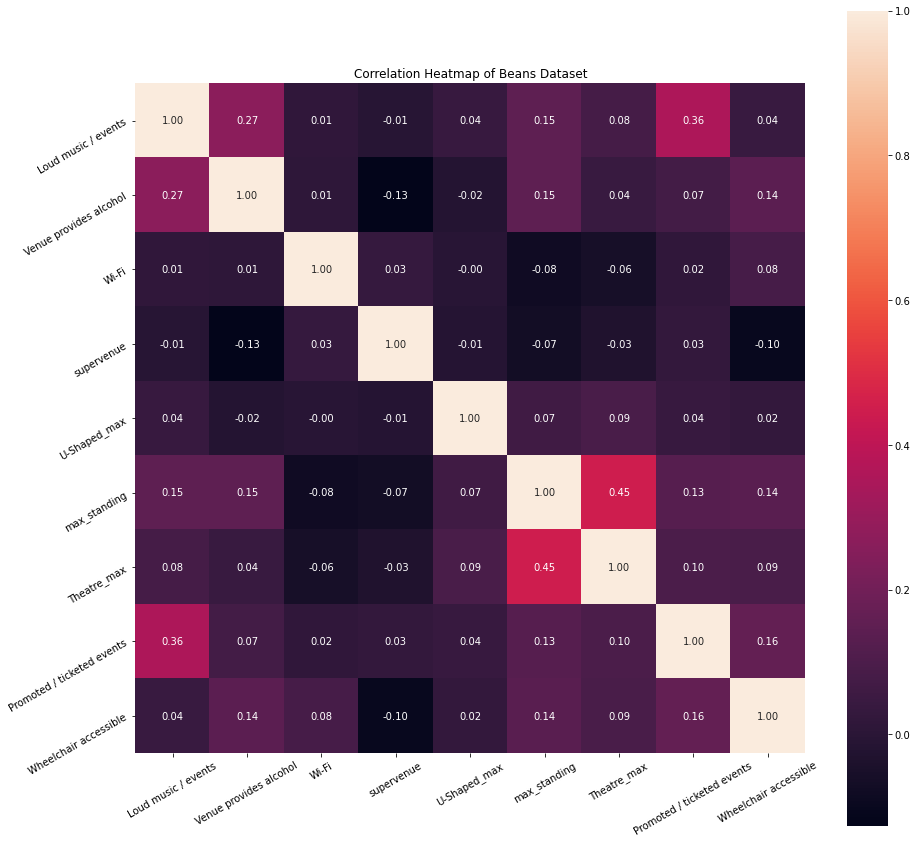

In [ ]:
#checking data correlation to make sure that there is no unnecessary data/columns
corr_matrix = df.corr()

plt.figure(figsize=(15,15))
plt.title('Correlation Heatmap of Beans Dataset')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

In [ ]:
#check balance of label col
df['Wheelchair accessible'].value_counts()

False    1955
True     1955
Name: Wheelchair accessible, dtype: int64

In [ ]:
#checking for duplicate records
df.duplicated().sum()

450

In [ ]:
#removing duplicates
df = df.drop_duplicates()

In [ ]:
#check wheather data is balanced
df['Wheelchair accessible'].value_counts()

True     1803
False    1657
Name: Wheelchair accessible, dtype: int64

In [ ]:
df

,venue_name,Loud music / events,Venue provides alcohol,Wi-Fi,supervenue,U-Shaped_max,max_standing,Theatre_max,Promoted / ticketed events,Wheelchair accessible
0,techspace aldgate east,False,0,True,False,35.045455,0,112.715867,False,False
1,green rooms hotel,True,1,True,False,40.000000,120,80.000000,True,False
2,148 leadenhall street,False,0,True,False,35.045455,0,112.715867,False,False
3,conway hall,False,0,True,False,35.045455,60,60.000000,False,False
4,gridiron building,False,0,True,False,35.045455,0,112.715867,False,False
...,...,...,...,...,...,...,...,...,...,...
3904,city cruises ltd,False,1,False,False,35.045455,220,112.715867,False,True
3905,the hurlingham club,True,1,True,False,40.000000,450,450.000000,False,True
3906,"landmark - aldgate, london",False,0,True,False,28.000000,0,28.000000,False,True
3907,ortus conference and events venue,False,1,True,False,13.000000,20,20.000000,False,True


In [ ]:
#change boolean cols to numerical with label encoder
#importing libraries
le = preprocessing.LabelEncoder()
df['Wheelchair accessible']= le.fit_transform(df['Wheelchair accessible'])
df['Loud music / events']= le.fit_transform(df['Loud music / events'])
df['Wi-Fi']= le.fit_transform(df['Wi-Fi'])
df['supervenue']= le.fit_transform(df['supervenue'])
df['Promoted / ticketed events']= le.fit_transform(df['Promoted / ticketed events'])


In [ ]:
df

,venue_name,Loud music / events,Venue provides alcohol,Wi-Fi,supervenue,U-Shaped_max,max_standing,Theatre_max,Promoted / ticketed events,Wheelchair accessible
0,techspace aldgate east,0,0,1,0,35.045455,0,112.715867,0,0
1,green rooms hotel,1,1,1,0,40.000000,120,80.000000,1,0
2,148 leadenhall street,0,0,1,0,35.045455,0,112.715867,0,0
3,conway hall,0,0,1,0,35.045455,60,60.000000,0,0
4,gridiron building,0,0,1,0,35.045455,0,112.715867,0,0
...,...,...,...,...,...,...,...,...,...,...
3904,city cruises ltd,0,1,0,0,35.045455,220,112.715867,0,1
3905,the hurlingham club,1,1,1,0,40.000000,450,450.000000,0,1
3906,"landmark - aldgate, london",0,0,1,0,28.000000,0,28.000000,0,1
3907,ortus conference and events venue,0,1,1,0,13.000000,20,20.000000,0,1


<AxesSubplot:xlabel='U-Shaped_max'>

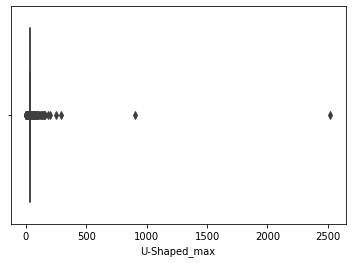

In [ ]:
#checking for outliers
sns.boxplot(data = df, x = 'U-Shaped_max')

<AxesSubplot:xlabel='max_standing'>

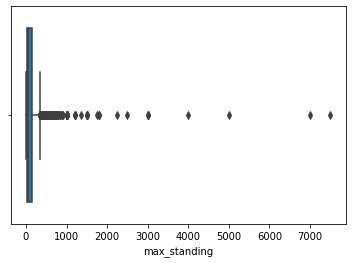

In [ ]:
sns.boxplot(data = df, x ='max_standing')

<AxesSubplot:xlabel='Theatre_max'>

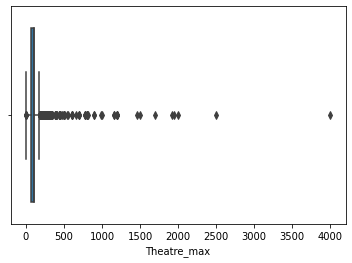

In [ ]:
sns.boxplot(data = df, x ='Theatre_max')

There are many outliers in Theatre_max, max_standing and U-Shaped_max columns need to be handeled

Handling Outliers

array([[<AxesSubplot:title={'center':'Loud music / events'}>,
        <AxesSubplot:title={'center':'Venue provides alcohol'}>,
        <AxesSubplot:title={'center':'Wi-Fi'}>],
       [<AxesSubplot:title={'center':'supervenue'}>,
        <AxesSubplot:title={'center':'U-Shaped_max'}>,
        <AxesSubplot:title={'center':'max_standing'}>],
       [<AxesSubplot:title={'center':'Theatre_max'}>,
        <AxesSubplot:title={'center':'Promoted / ticketed events'}>,
        <AxesSubplot:title={'center':'Wheelchair accessible'}>]],
      dtype=object)

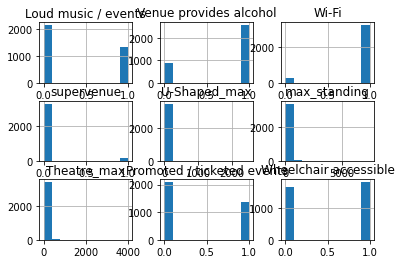

In [ ]:

df.hist()

lower bound is = 5.93 and higher bound is = 176.79 for Theatre_max
lower bound is = -175.00 and higher bound is = 345.00 for max_standing
lower bound is = 35.05 and higher bound is = 35.05 for U-Shaped_max


venue_name                      0
Loud music / events             0
Venue provides alcohol          0
Wi-Fi                           0
supervenue                      0
U-Shaped_max                  946
max_standing                  260
Theatre_max                   232
Promoted / ticketed events      0
Wheelchair accessible           0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2226 entries, 0 to 3904
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   venue_name                  2226 non-null   object 
 1   Loud music / events         2226 non-null   int64  
 2   Venue provides alcohol      2226 non-null   int64  
 3   Wi-Fi                       2226 non-null   int64  
 4   supervenue                  2226 non-null   int64  
 5   U-Shaped_max                2226 non-null   float64
 6   max_standing                2226 non-null   float64
 7   Theatre_max                 2226 non-null   float64
 8   Promoted / ticketed events  2226 non-null   int64  
 9   Wheelchair accessible       2226 non-null   int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 191.3+ KB


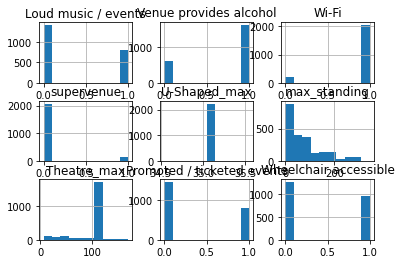

In [ ]:
clean_df = df.copy()
outliers_columns = ['Theatre_max', 'max_standing', 'U-Shaped_max']
for col in outliers_columns:
    q75, q25 = np.percentile(df.loc[:, col], [75, 25])
    intr_qr = q75 - q25
 
    max = q75 + (1.5 * intr_qr)
    min = q25 - (1.5 * intr_qr)

    print('lower bound is = %0.2f and higher bound is = %0.2f for %s' %(min, max, col))
    
    clean_df.loc[df[col] < min, col] = np.nan
    clean_df.loc[df[col] > max, col] = np.nan

display(clean_df.isna().sum())
clean_df = clean_df.dropna()
clean_df.hist()
clean_df.info()

So that data is perfectly balanced, doesn't have null values, datatypes seem fine, we can start the model.

In [ ]:
clean_df

,venue_name,Loud music / events,Venue provides alcohol,Wi-Fi,supervenue,U-Shaped_max,max_standing,Theatre_max,Promoted / ticketed events,Wheelchair accessible
0,techspace aldgate east,0,0,1,0,35.045455,0.0,112.715867,0,0
2,148 leadenhall street,0,0,1,0,35.045455,0.0,112.715867,0,0
3,conway hall,0,0,1,0,35.045455,60.0,60.000000,0,0
4,gridiron building,0,0,1,0,35.045455,0.0,112.715867,0,0
6,lloyds avenue,0,0,1,0,35.045455,0.0,112.715867,0,0
...,...,...,...,...,...,...,...,...,...,...
3894,15 artillery lane,0,1,1,0,35.045455,150.0,112.715867,0,1
3896,hard rock cafe oxford street,1,1,1,0,35.045455,100.0,112.715867,1,1
3901,vue islington,0,1,0,0,35.045455,0.0,92.000000,1,1
3902,lord's cricket ground,0,1,1,0,35.045455,169.0,130.000000,1,1


In [ ]:
#separating features and label columns
X = clean_df.iloc[:,1:-1]
y = clean_df.iloc[:,-1]

In [ ]:
#splitting data to train and test data with the common ration 80:20 respectively
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=42)

Trying different classification models

RandomForest Classifier

In [ ]:


clf = Pipeline(steps=[('scaler',StandardScaler()),('rf',RandomForestClassifier(max_depth=8, random_state=0))])
clf.fit(trainX, trainy)



Pipeline(steps=[('scaler', StandardScaler()),
                ('rf', RandomForestClassifier(max_depth=8, random_state=0))])

In [ ]:
predictions = clf.predict(testX)

In [ ]:
from sklearn.metrics import f1_score
f1_score(testy, predictions)

0.4347826086956521

In [ ]:
print(clf.score(trainX, trainy))
print(clf.score(testX, testy))

0.7213483146067415
0.5919282511210763


In [ ]:
mean_squared_error(testy, predictions)

0.4080717488789238

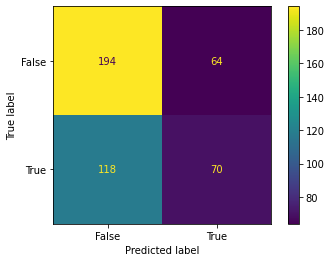

In [ ]:
CM = confusion_matrix(testy, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = CM, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
Specificity = metrics.recall_score(testy, predictions, pos_label=0)
print(Specificity)

0.751937984496124


Kneighbours Classifier

In [ ]:
model = Pipeline(steps=[('scaler',StandardScaler()),('kn',KNeighborsClassifier())])

model.fit(trainX, trainy)


Pipeline(steps=[('scaler', StandardScaler()), ('kn', KNeighborsClassifier())])

In [ ]:
predictions = model.predict(testX)

In [ ]:
print(model.score(trainX, trainy))
print(model.score(testX, testy))

0.6786516853932584
0.5538116591928252


In [ ]:
mean_squared_error(testy, predictions)

0.4461883408071749

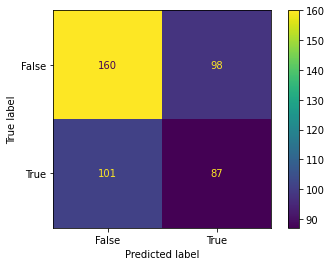

In [ ]:
CM = confusion_matrix(testy, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = CM, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
Specificity = metrics.recall_score(testy, predictions, pos_label=0)
print(Specificity)

0.6201550387596899


SVC

In [ ]:

clf = Pipeline(steps=[('scaler',StandardScaler()),('svc',SVC())])
clf.fit(trainX, trainy)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())])

In [ ]:
predictions = clf.predict(testX)

In [ ]:
print(clf.score(trainX, trainy))
print(clf.score(testX, testy))

0.648314606741573
0.6278026905829597


In [ ]:
mean_squared_error(testy, predictions)

0.3721973094170404

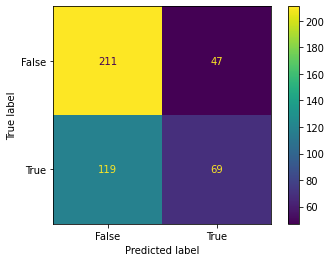

In [ ]:
CM = confusion_matrix(testy, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = CM, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
Specificity = metrics.recall_score(testy, predictions, pos_label=0)
print(Specificity)

0.8178294573643411


Gradient Boosting

In [ ]:
clf = Pipeline(steps=[('scaler',StandardScaler()),('gb',GradientBoostingClassifier(n_estimators=200, learning_rate=0.07, max_depth=5, random_state=0))])
clf.fit(trainX, trainy)


Pipeline(steps=[('scaler', StandardScaler()),
                ('gb',
                 GradientBoostingClassifier(learning_rate=0.07, max_depth=5,
                                            n_estimators=200,
                                            random_state=0))])

In [ ]:
predictions = clf.predict(testX)

In [ ]:
print(clf.score(trainX, trainy))
print(clf.score(testX, testy))

0.7629213483146068
0.5919282511210763


In [ ]:
mean_squared_error(testy, predictions)

0.4080717488789238

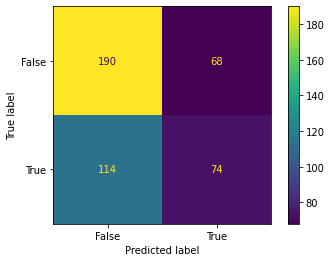

In [ ]:
CM = confusion_matrix(testy, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = CM, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
Specificity = metrics.recall_score(testy, predictions, pos_label=0)
print(Specificity)

0.7364341085271318


Try Applying PCA to extract only important features

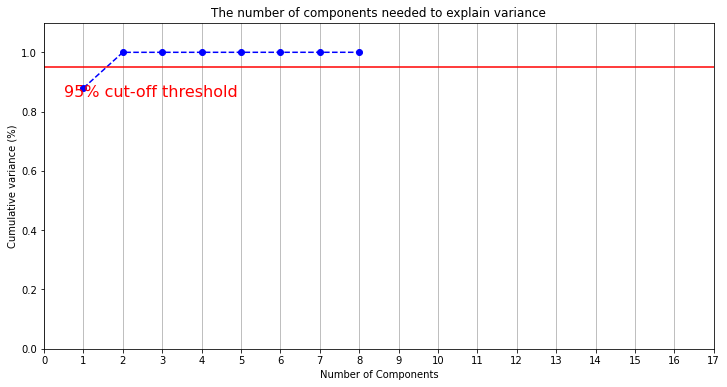

In [ ]:



#get best number of components to apply PCA
pca = PCA().fit(clean_df.iloc[:,1:-1])

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 9, step=1)
y = np.cumsum(pca.explained_variance_ratio_)



plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')



plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 18, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')



plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)



ax.grid(axis='x')
plt.show()

In [ ]:
#according to the graph, we can apply PCA by only 2 components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
df_PCA = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
df_PCA['Wheelchair accessible'] = df['Wheelchair accessible']


Apply Models after PCA

In [ ]:
df_PCA = df_PCA.round(3)
df_PCA = df_PCA.dropna()


df_PCA

,principal component 1,principal component 2,Wheelchair accessible
0,-74.458,-19.322,0.0
1,-74.458,-19.322,0.0
2,-19.380,38.517,0.0
3,-74.458,-19.322,0.0
4,-74.458,-19.322,0.0
...,...,...,...
2221,74.950,-5.994,1.0
2222,25.149,-10.436,1.0
2223,-76.297,1.312,1.0
2224,95.411,-21.521,1.0


In [ ]:
#split again as the columns changed
X = df_PCA.iloc[:,1:-1]
y = df_PCA.iloc[:,-1]

In [ ]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=42)

KNN

In [ ]:
model = Pipeline(steps=[('scaler',StandardScaler()),('kn',KNeighborsClassifier())])
model.fit(trainX, trainy)



Pipeline(steps=[('scaler', StandardScaler()), ('kn', KNeighborsClassifier())])

In [ ]:
predictions = model.predict(testX)

In [ ]:
print(model.score(trainX, trainy))
print(model.score(testX, testy))

0.861038961038961
0.8155844155844156


In [ ]:
mean_squared_error(testy, predictions)

0.18441558441558442

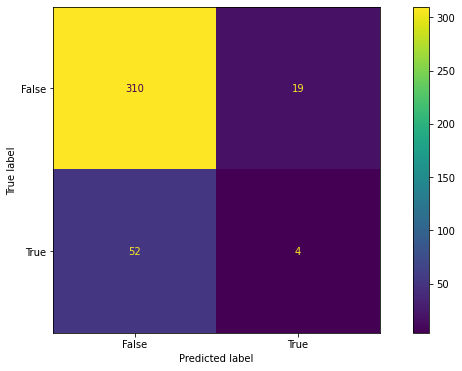

In [ ]:
CM = confusion_matrix(testy, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = CM, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
Specificity = metrics.recall_score(testy, predictions, pos_label=0)
print(Specificity)

0.9422492401215805


GradientBoosting

In [ ]:
clf = Pipeline(steps=[('scaler',StandardScaler()),('gb',GradientBoostingClassifier(n_estimators=600, learning_rate=0.05, max_depth=4, random_state=0))])
clf.fit(trainX, trainy)

Pipeline(steps=[('scaler', StandardScaler()),
                ('gb',
                 GradientBoostingClassifier(learning_rate=0.05, max_depth=4,
                                            n_estimators=600,
                                            random_state=0))])

In [ ]:
predictions = clf.predict(testX)

In [ ]:
print(clf.score(trainX, trainy))
print(clf.score(testX, testy))

0.8980519480519481
0.8207792207792208


In [ ]:
mean_squared_error(testy, predictions)

0.17922077922077922

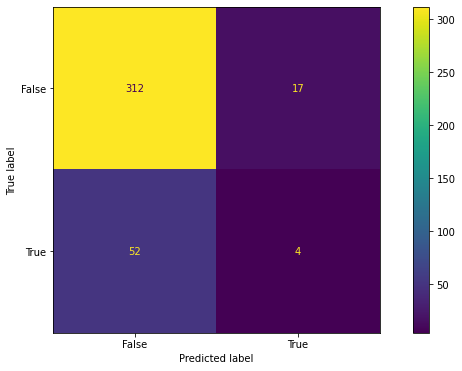

In [ ]:
CM = confusion_matrix(testy, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = CM, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
Specificity = metrics.recall_score(testy, predictions, pos_label=0)
print(Specificity)

0.9483282674772037


SVM, standard scaler

In [ ]:
clf = Pipeline(steps=[('scaler',StandardScaler()), ('svc',SVC(gamma='scale'))])
clf.fit(trainX, trainy)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())])

In [ ]:
predictions = clf.predict(testX)

In [ ]:
print(clf.score(trainX, trainy))
print(clf.score(testX, testy))

0.8623376623376623
0.8545454545454545


In [ ]:
mean_squared_error(testy, predictions)

0.14545454545454545

get confusion matrix to get number of true negatives and its percentage to make sure it exceeds the two thirds of predictions

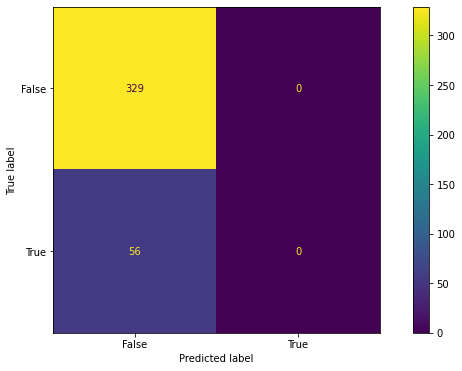

In [ ]:
CM = confusion_matrix(testy, predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = CM, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
Specificity = metrics.recall_score(testy, predictions, pos_label=0)
print(Specificity)

1.0


Model is biased to negative labels, it didn't predict any true values.
Although it gave the highest accuracy but its not accurate.

So either gradient boosting or KNN after applying PCA is a good choice as their accuracy is high and the true negative percentage is above required.

Conclusion

PCA applies well on data and affects model accuracy 

-Data had too much outliers


-Data has lots of columns (features), not all of them have same importance, we can extract important info from them by applying PCA

-Labels col is balanced which is good for model.